In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


**Loading the dataset.**

In [2]:
df = pd.read_csv("/content/1000_Companies.csv")

**Understanding The data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [4]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


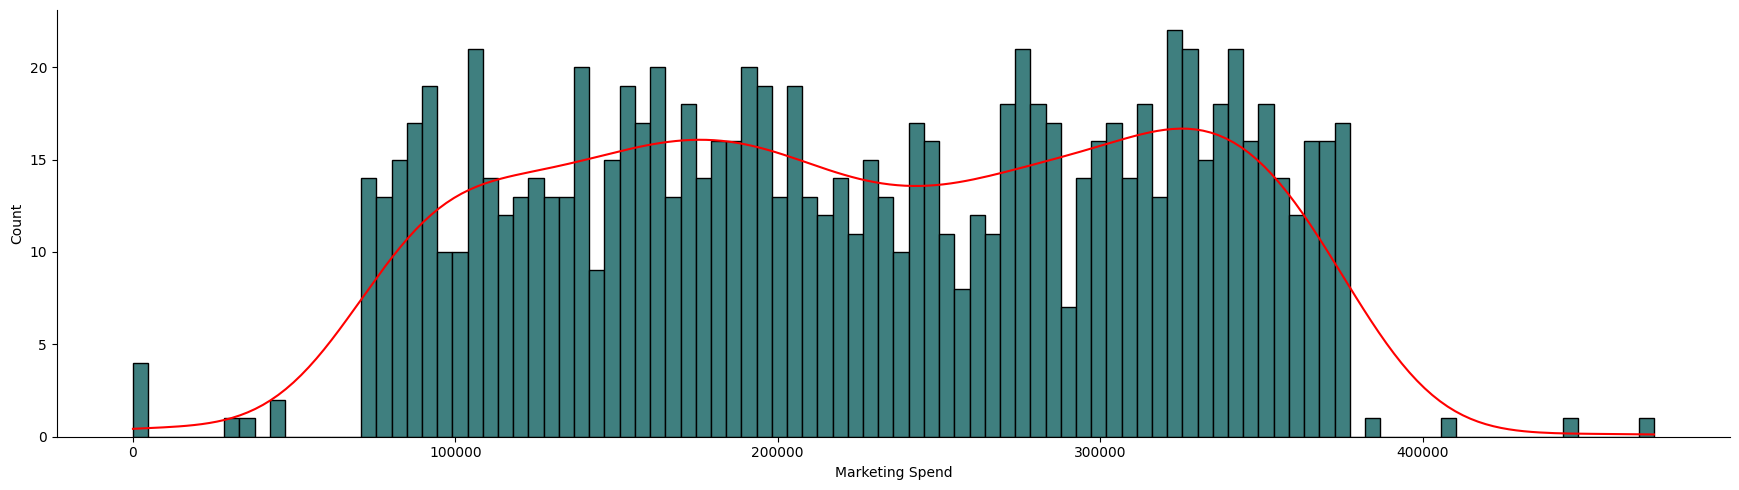

In [6]:
sns.displot(data=df, x="Marketing Spend", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

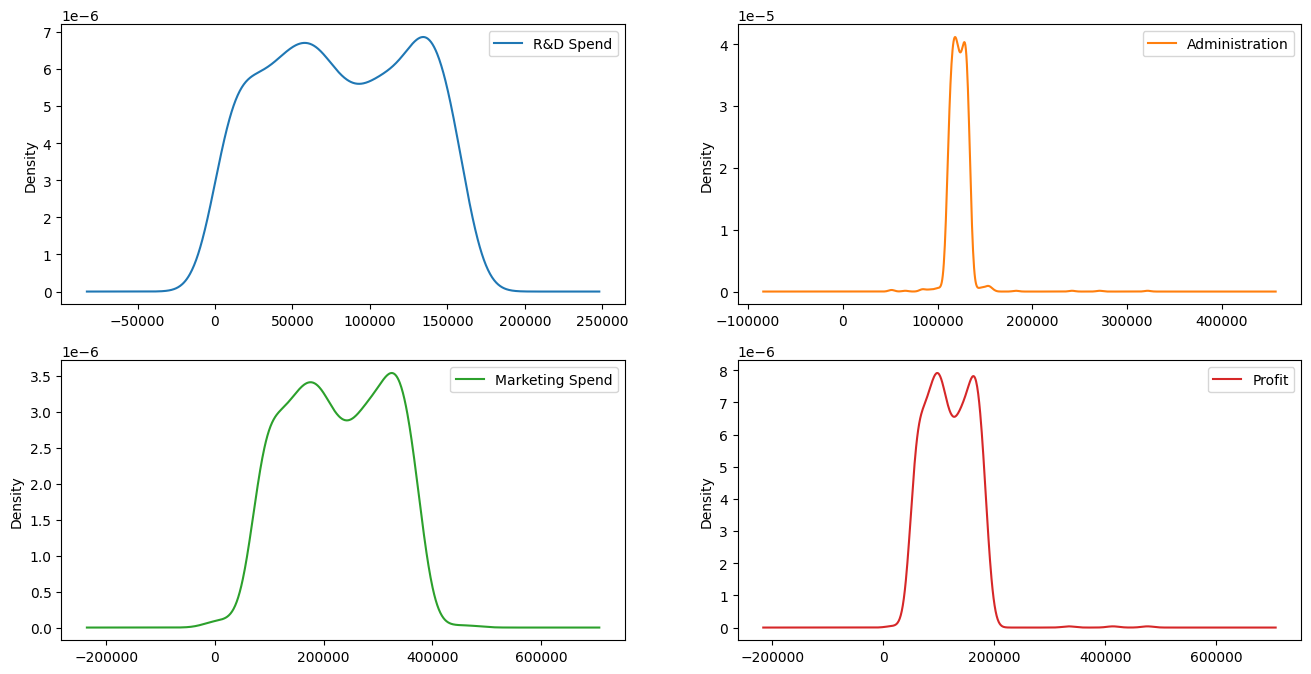

In [7]:
df.plot(kind='kde', subplots=True, layout=(2,2), sharex=False, figsize= (16,8))
plt.show()

In [9]:
df.State.value_counts()

State
California    344
New York      334
Florida       322
Name: count, dtype: int64

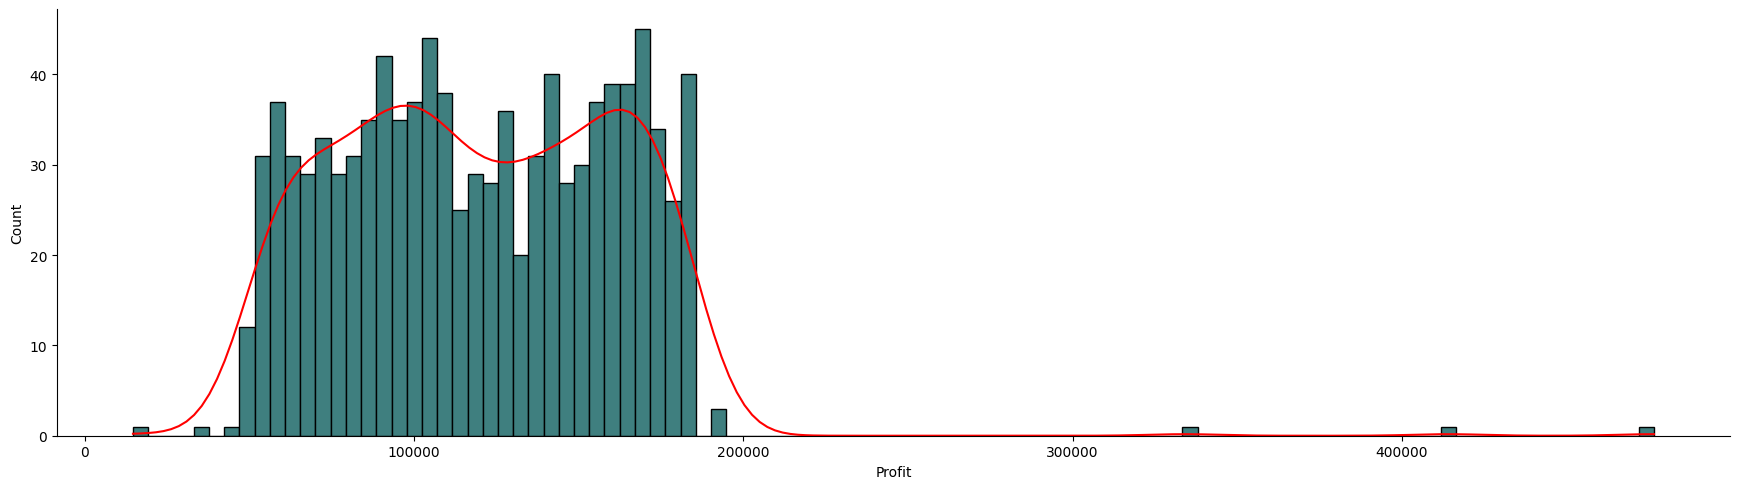

In [10]:
sns.displot(data=df, x="Profit", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

In [13]:
## segregating numerical and categorical variables
numerical_columns =df.select_dtypes(include=['int', 'float']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [35]:
numerical_columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [15]:
categorical_columns

Index(['State'], dtype='object')

**Visualization of Correlation Matrix**

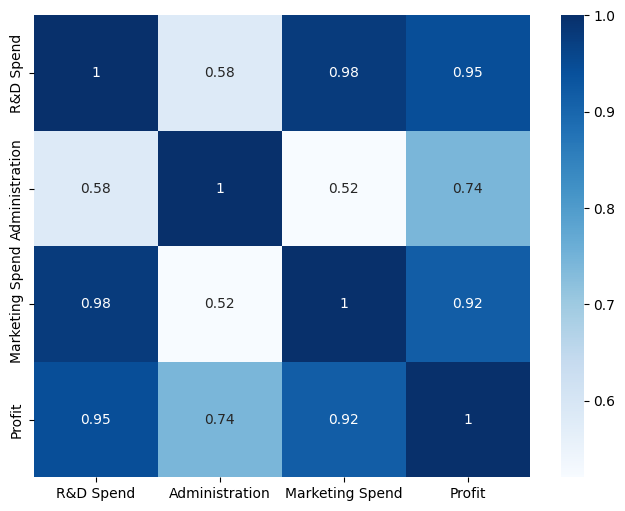

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_columns].corr(),annot=True,cmap='Blues');

In [37]:
# Convert numerical_columns to a list
numerical_columns = list(numerical_columns)

# Remove 'Profit' from numerical_columns
numerical_columns.remove('Profit')


**Data Transformation Phase:**

In [38]:
# Automate Data Pre-Processing:-
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder,StandardScaler
from sklearn.pipeline import Pipeline

In [19]:
df.State

0        New York
1      California
2         Florida
3        New York
4         Florida
          ...    
995    California
996    California
997    California
998    California
999      New York
Name: State, Length: 1000, dtype: object

In [20]:
## We need to convert the string values of a State feature into a numerical value by using encoding techniques

In [39]:
## Numerical pipeline
num_pipeline=Pipeline(
    steps=[
        ('scaler',StandardScaler())
    ]
)

## categorical pipeline
cat_pipeline=Pipeline(
    steps=[
        ('label',OrdinalEncoder()),
        ('scaler',StandardScaler())
    ]
)

In [40]:
## Combining Above 2 Pipelines:-
processor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_columns),
      ('cat_pipeline',cat_pipeline,categorical_columns)
])

In [41]:
X=df.drop('Profit',axis=1)

In [42]:
y = df['Profit']

In [26]:
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.800,471784.1000,New York
1,162597.70,151377.590,443898.5300,California
2,153441.51,101145.550,407934.5400,Florida
3,144372.41,118671.850,383199.6200,New York
4,142107.34,91391.770,366168.4200,Florida
...,...,...,...,...
995,54135.00,118451.999,173232.6695,California
996,134970.00,130390.080,329204.0228,California
997,100275.47,241926.310,227142.8200,California
998,128456.23,321652.140,281692.3200,California


In [50]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [45]:
## Data will be passed through pipelines and we will get pre-processed Data:-
X_train=pd.DataFrame(processor.fit_transform(X_train),columns=processor.get_feature_names_out())
X_test=pd.DataFrame(processor.transform(X_test),columns=processor.get_feature_names_out())

In [46]:
X_train

,num_pipeline__R&D Spend,num_pipeline__Administration,num_pipeline__Marketing Spend,cat_pipeline__State
0,0.892128,0.484374,0.875151,1.204172
1,0.952804,0.519621,0.934743,1.204172
2,1.019769,0.558521,1.000511,1.204172
3,0.661271,0.350269,0.648420,-1.211072
4,1.095587,0.602564,1.074975,-1.211072
...,...,...,...,...
695,1.489417,0.831340,1.461766,-1.211072
696,1.274494,0.706491,1.250684,1.204172
697,1.548061,0.865407,1.519363,1.204172
698,-1.302850,-0.790692,-1.280602,1.204172


In [47]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


In [48]:
# Initializing regression models along with their hyperparameters
regression_models = {
    'Linear Regression': (LinearRegression(), {}),  # No hyperparameters for Linear Regression
    'Ridge Regression': (Ridge(), {'regressor__alpha': [0.1, 1, 10]}),
    'Lasso Regression': (Lasso(), {'regressor__alpha': [0.1, 1, 10]}),
    'Random Forest Regression': (RandomForestRegressor(), {'regressor__n_estimators': [50, 100, 200]}),
    'Gradient Boosting Regression': (GradientBoostingRegressor(), {'regressor__n_estimators': [50, 100, 200],
                                                                    'regressor__learning_rate': [0.01, 0.1, 0.2]}),
    'Support Vector Regression': (SVR(), {'regressor__C': [0.1, 1, 10], 'regressor__kernel': ['linear', 'rbf']}),
    'K-Nearest Neighbors Regression': (KNeighborsRegressor(), {'regressor__n_neighbors': [3, 5, 7]}),
    'Decision Tree Regression': (DecisionTreeRegressor(), {'regressor__max_depth': [None, 10, 20, 30]})
}

In [62]:
def train_and_tune_model(model, params, X_train, y_train):
    pipeline = Pipeline([
        ('regressor', model)
    ])
     # Perform GridSearchCV
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Return the best estimator
    return grid_search.best_estimator_

In [63]:
best_models = {}

In [64]:
for model_name, (model, params) in regression_models.items():
    best_model = train_and_tune_model(model, params, X_train, y_train)
    best_models[model_name] = best_model

In [58]:
for model_name, best_model in best_models.items():
    print(f"Best hyperparameters for {model_name}: {best_model.named_steps['regressor'].get_params()}")

Best hyperparameters for Linear Regression: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Best hyperparameters for Ridge Regression: {'alpha': 10, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
Best hyperparameters for Lasso Regression: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Best hyperparameters for Random Forest Regression: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Best hyperparameters for Gradi

In [66]:
rmse_values = {}
from sklearn.metrics import mean_squared_error
for model_name, best_model in best_models.items():
  best_model = best_models[model_name]

  # Make predictions on the test set
  y_pred = best_model.predict(X_test)

  # Calculate RMSE
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  print(f"RMSE for {model_name}: {rmse}")
  rmse_values[model_name] = rmse

RMSE for Linear Regression: 7877.323310615441
RMSE for Ridge Regression: 7763.462266941279
RMSE for Lasso Regression: 7877.404704028226
RMSE for Random Forest Regression: 4709.303552592243
RMSE for Gradient Boosting Regression: 5907.541936090361
RMSE for Support Vector Regression: 27286.25868825866
RMSE for K-Nearest Neighbors Regression: 4881.075319456615
RMSE for Decision Tree Regression: 8522.212865038666


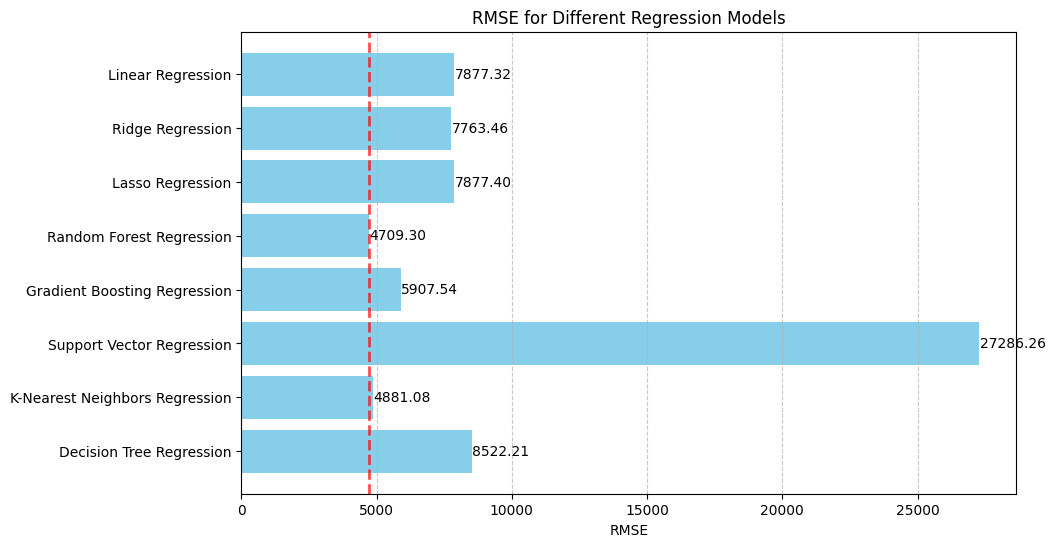

In [71]:
# Get model names and RMSE values
model_names = list(rmse_values.keys())
rmse_scores = list(rmse_values.values())

colors = ['lightblue' if rmse < min(rmse_scores) else 'skyblue' for rmse in rmse_scores]

plt.figure(figsize=(10, 6))
bars = plt.barh(model_names, rmse_scores, color=colors)

for bar, rmse in zip(bars, rmse_scores):
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height() / 2, f'{rmse:.2f}', va='center', ha='left')

plt.xlabel('RMSE')
plt.title('RMSE for Different Regression Models')
plt.gca().invert_yaxis()

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.axvline(min(rmse_scores), color='red', linestyle='--', linewidth=2, alpha=0.7)

plt.show()
